<a href="https://colab.research.google.com/github/pramod1997/submission_data_sciece/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This file is helper for the treatment of the data done in data_prep file .This file contains all the plots and thoughts on how to replace missing value , encode the string columns for feeding to the model**

In [0]:
## necessay libray

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime , timedelta
warnings.filterwarnings("ignore")


In [0]:
## reading data from sheet 2 
df = pd.read_excel('Data.xlsx' , sheet_name = 1)

In [3]:
df.head()

,Linkedin.is.Verified,Facebook.is.Verified,Date.of.Birth,Gender,Education.Level,No.of.dependents,Detailed.reason.by.Applicant,CRIF.S1.Score,Application.incomplete.date,Loan.Amount,...,Residential.status,UTM.Source,Created.Date,pymt_standing,Interest.Rate,Maturity.Date,Total.Amount.Paid,Principal.Advance.Remaining,Delinquent.Amount,Fee.Set
0,NaN,NaN,1980-07-03,Male,Professional,1 to 2,I am working as Software Eng in a IT firm sinc...,753.0,2017-03-01,200000,...,Rented,NaN,2016-11-18,Active - Good Standing,16.41,2020-01-04,113840.00,123741.56,0.00,1-M3
1,NaN,NaN,1983-02-06,Male,Graduate,1 to 2,I am working as an analyst Programmer in a IT ...,NaN,2016-11-18,85000,...,Rented,NaN,2016-11-18,Active - Good Standing,19.50,2018-01-12,87209.00,16762.90,0.00,1-M5
2,NaN,NaN,1994-12-20,Male,Upto Hr Secondary,0,I have enough salary enough that i can take ca...,NaN,2016-11-19,50000,...,Self or spouse owned,NaN,2016-11-19,Active - Bad Standing,16.07,2018-01-12,31222.92,30407.81,19500.56,1-M3
3,NaN,NaN,1981-04-20,Male,Graduate,1 to 2,"Hi team my name is Balaji Polam,from last mont...",NaN,2016-11-20,130000,...,Self or spouse owned,NaN,2016-11-20,Closed - Obligations met,24.23,2019-01-12,174238.16,0.00,0.00,1-M7
4,NaN,NaN,1977-05-29,Male,Post Graduate,3 to 5,I want to pay children's education fess and my...,NaN,2016-11-21,85000,...,Company Quarters,NaN,2016-11-21,Active - Good Standing,19.55,2019-01-12,63229.00,47146.24,0.00,1-M5


In [4]:
print("Percentage of missing data per column - ")


((df.isnull())/len(df)*100).sum()

Percentage of missing data per column - 


Linkedin.is.Verified                         72.512563
Facebook.is.Verified                         59.597990
Date.of.Birth                                 0.150754
Gender                                        0.150754
Education.Level                               0.150754
No.of.dependents                              0.150754
Detailed.reason.by.Applicant                  0.351759
CRIF.S1.Score                                 9.447236
Application.incomplete.date                   4.773869
Loan.Amount                                   0.000000
Payment.Amount                                0.000000
Interest.Paid                                 0.000000
Principal.Advance.Paid                        0.000000
Contract.Date                                 0.000000
EPFO.Verification.Status                    100.000000
Marital.status                                0.150754
Total.years.of.experience.in.Employment.      0.150754
Application.Completion.time                   0.904523
Term      

In [0]:
### dropping columns
df.drop(['Linkedin.is.Verified','Facebook.is.Verified','EPFO.Verification.Status',
        'UTM.Source'], axis  =1 , inplace = True)

In [0]:
### after seeing the description of the varibale dropping some more 
cols = ['Detailed.reason.by.Applicant', 'Application.incomplete.date' , 'CL.Purpose..Name' , 'Application.Completion.time' ,'Created.Date'
       ]

In [0]:
df.drop(cols, axis  =1 , inplace = True)

In [8]:
df.dtypes

Date.of.Birth                               datetime64[ns]
Gender                                              object
Education.Level                                     object
No.of.dependents                                    object
CRIF.S1.Score                                      float64
Loan.Amount                                          int64
Payment.Amount                                     float64
Interest.Paid                                      float64
Principal.Advance.Paid                             float64
Contract.Date                               datetime64[ns]
Marital.status                                      object
Total.years.of.experience.in.Employment.           float64
Term                                                 int64
First.Payment.Date.y                        datetime64[ns]
Estimated.Interest                                 float64
Last.Payment.Date                           datetime64[ns]
Bank.Transactions.Fetched                          float

In [9]:
## to see the list of columns in df
cols = [x for x in df.columns]
cols

['Date.of.Birth',
 'Gender',
 'Education.Level',
 'No.of.dependents',
 'CRIF.S1.Score',
 'Loan.Amount',
 'Payment.Amount',
 'Interest.Paid',
 'Principal.Advance.Paid',
 'Contract.Date',
 'Marital.status',
 'Total.years.of.experience.in.Employment.',
 'Term',
 'First.Payment.Date.y',
 'Estimated.Interest',
 'Last.Payment.Date',
 'Bank.Transactions.Fetched',
 'Debt.service.ratio',
 'Application.ID',
 'Salary.Income.current.month',
 'Residential.status',
 'pymt_standing',
 'Interest.Rate',
 'Maturity.Date',
 'Total.Amount.Paid',
 'Principal.Advance.Remaining',
 'Delinquent.Amount',
 'Fee.Set']

In [0]:
cols = [x for x in df.columns if df[x].dtype =='float64']

In [11]:
cols

['CRIF.S1.Score',
 'Payment.Amount',
 'Interest.Paid',
 'Principal.Advance.Paid',
 'Total.years.of.experience.in.Employment.',
 'Estimated.Interest',
 'Bank.Transactions.Fetched',
 'Debt.service.ratio',
 'Salary.Income.current.month',
 'Interest.Rate',
 'Total.Amount.Paid',
 'Principal.Advance.Remaining',
 'Delinquent.Amount']

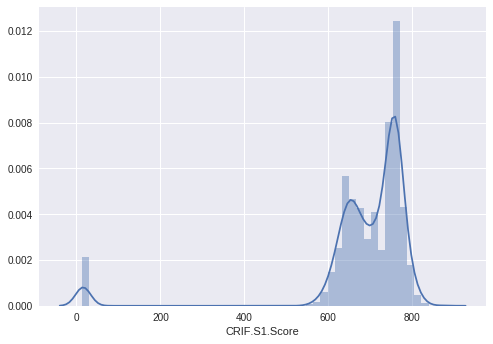

In [12]:
sns.distplot(df['CRIF.S1.Score'][df['CRIF.S1.Score'].notnull()])   ### distribution by masking nan values

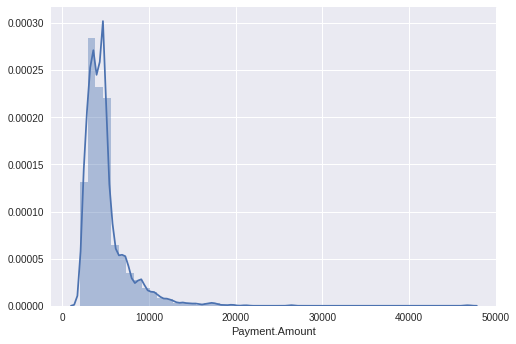

In [13]:
sns.distplot(df['Payment.Amount'][df['Payment.Amount'].notnull()])

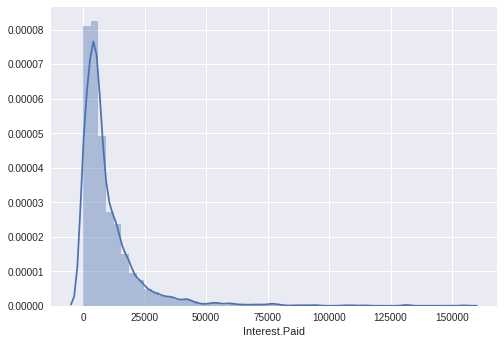

In [14]:
sns.distplot(df['Interest.Paid'][df['Interest.Paid'].notnull()])

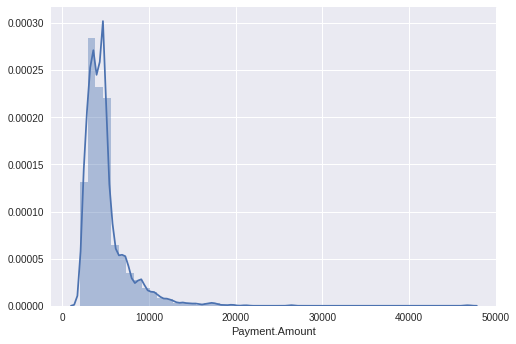

In [15]:
sns.distplot(df['Payment.Amount'][df['Payment.Amount'].notnull()])

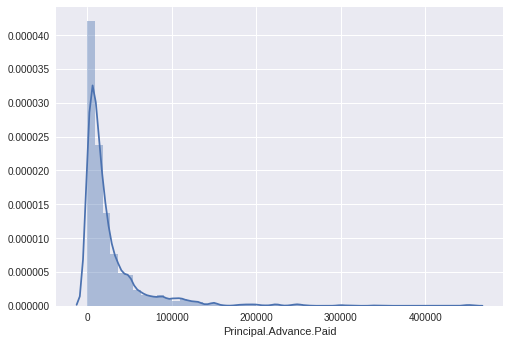

In [16]:
sns.distplot(df['Principal.Advance.Paid'][df['Principal.Advance.Paid'].notnull()])

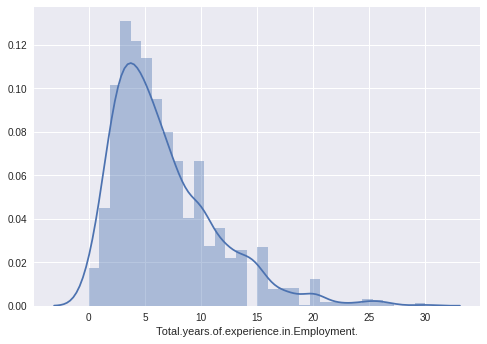

In [17]:
sns.distplot(df['Total.years.of.experience.in.Employment.'][df['Total.years.of.experience.in.Employment.'].notnull()])

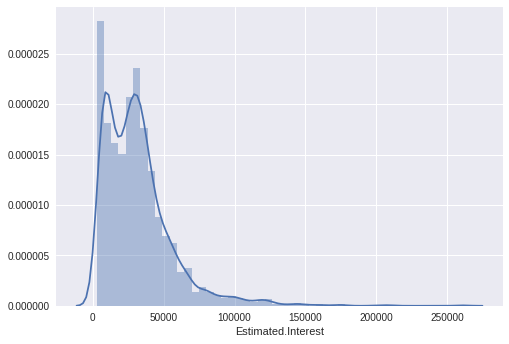

In [18]:
sns.distplot(df['Estimated.Interest'][df['Estimated.Interest'].notnull()])

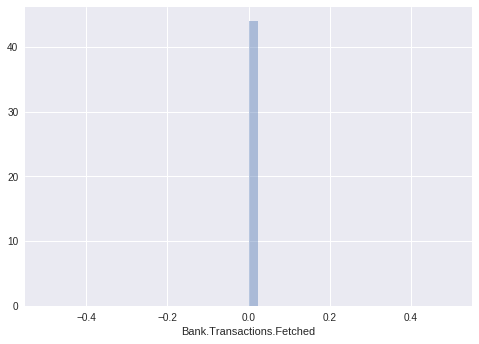

In [19]:
sns.distplot(df['Bank.Transactions.Fetched'][df['Bank.Transactions.Fetched'].notnull()])  ##  a redudant col

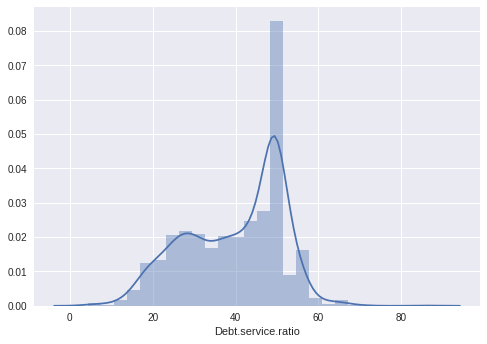

In [20]:
sns.distplot(df['Debt.service.ratio'][df['Debt.service.ratio'].notnull()])

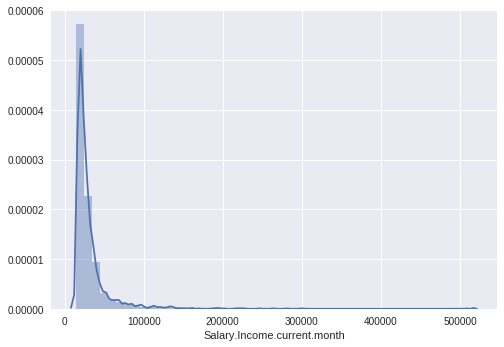

In [21]:
sns.distplot(df['Salary.Income.current.month'][df['Salary.Income.current.month'].notnull()])

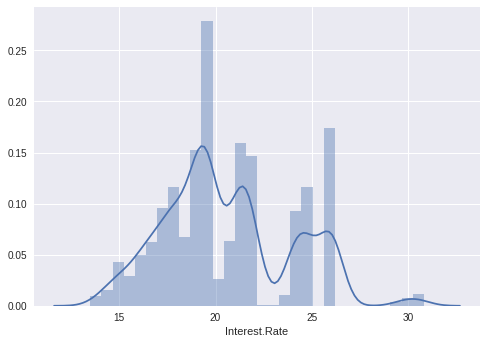

In [22]:
sns.distplot(df['Interest.Rate'][df['Interest.Rate'].notnull()])

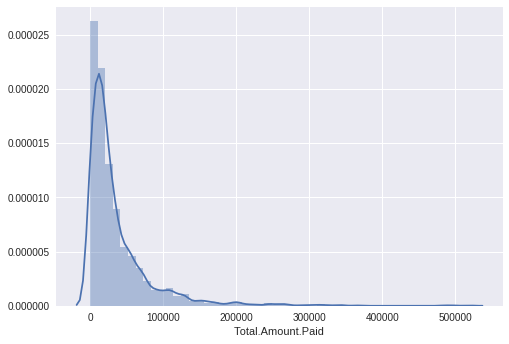

In [23]:
sns.distplot(df['Total.Amount.Paid'][df['Total.Amount.Paid'].notnull()])

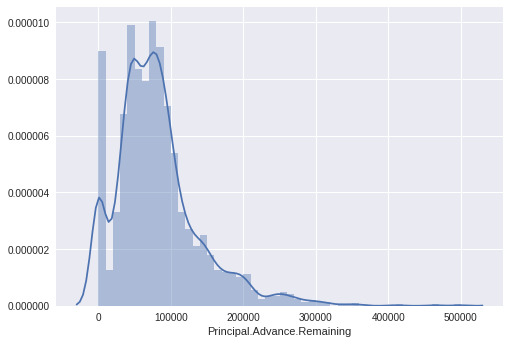

In [24]:
sns.distplot(df[ 'Principal.Advance.Remaining'][df[ 'Principal.Advance.Remaining'].notnull()])

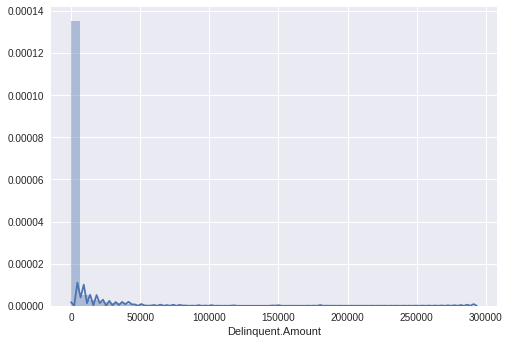

In [25]:
sns.distplot(df['Delinquent.Amount'][df['Delinquent.Amount'].notnull()])

In [0]:
## since the most of the data is totally skewed ---- > we apply sone transfromation on the data

In [0]:
### replacing every missing value in numeric cols with mean
### replacing with mean ---> 
for x in df.columns:
  if df[x].dtype=='float64':
    df[x].fillna(df[x].mean(),inplace =True)

In [28]:
## moving to string cols
cols = [x for x in df.columns if df[x].dtype !='float64']
cols

['Date.of.Birth',
 'Gender',
 'Education.Level',
 'No.of.dependents',
 'Loan.Amount',
 'Contract.Date',
 'Marital.status',
 'Term',
 'First.Payment.Date.y',
 'Last.Payment.Date',
 'Application.ID',
 'Residential.status',
 'pymt_standing',
 'Maturity.Date',
 'Fee.Set']

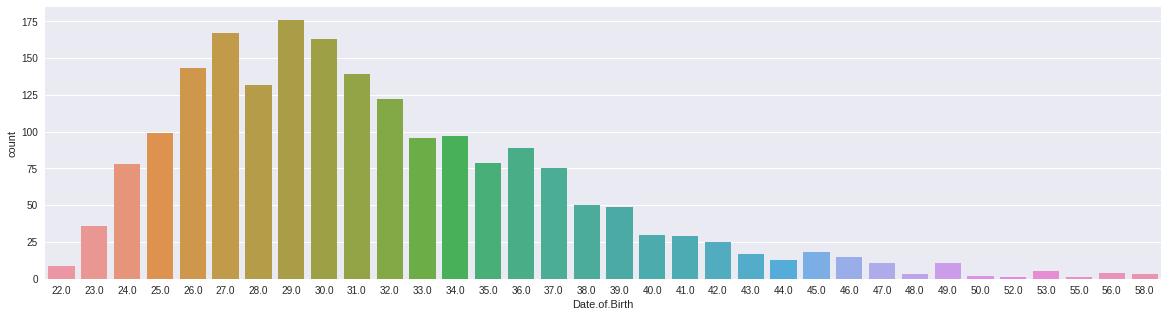

In [29]:
present = datetime.now()
present_year = present.year
df['Date.of.Birth'] = (present_year - df['Date.of.Birth'].apply(lambda x: x.year))
### got the age do the user
plt.figure(figsize = (20,5))
sns.countplot(df['Date.of.Birth'])

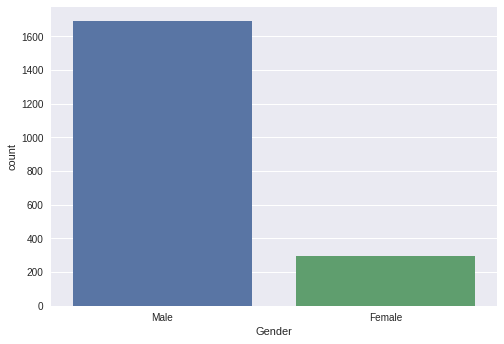

In [30]:
sns.countplot(df['Gender'])
## most of the data belong to men and hence missing values will be updated as 'male

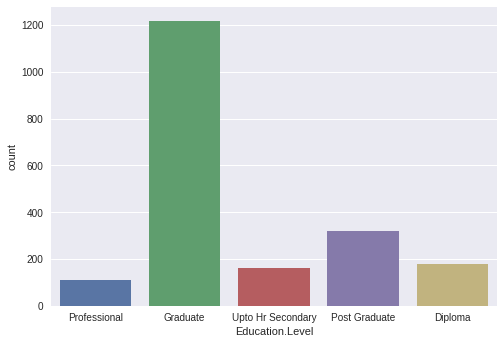

In [31]:
sns.countplot(df['Education.Level'])
## since the most of the data belong to graduate --> misisng value as graduate

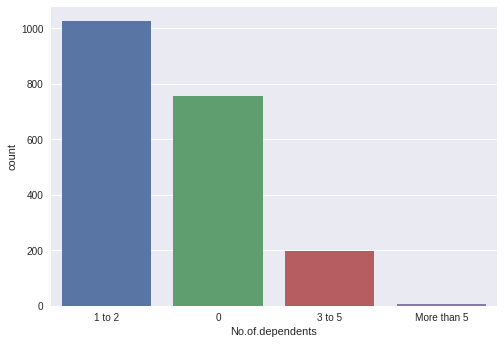

In [32]:
### assigning 1 to 2 basis of frequency ---> for encoding the data
### ordinal variable
### 0 - for 0
## 1 for 1 to 2
### 2 for 3 to 5
## # for more than 5
sns.countplot(df['No.of.dependents'])   ### missing values will be updated as 1to 2


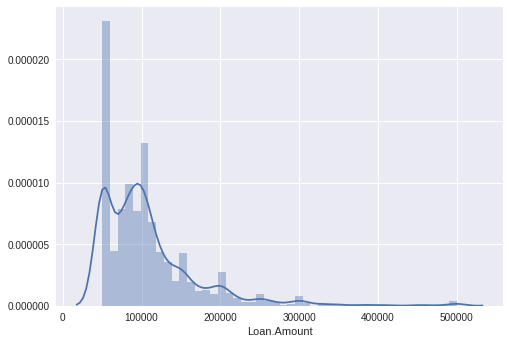

In [33]:
df['Loan.Amount'] = df['Loan.Amount'].astype('float64')   ### convert loan amount to float varible
sns.distplot(df['Loan.Amount'])

In [0]:
### now we will consider this in  compute it in terms of months passed 

df['Contract.Date'] = (present.year -df['Contract.Date'].apply(lambda x:x.year) )*12 + present.month - df['Contract.Date'].apply(lambda x:x.month) - present.month

In [35]:
df['Contract.Date'].head()

0    21
1    25
2    25
3    24
4    25
Name: Contract.Date, dtype: int64

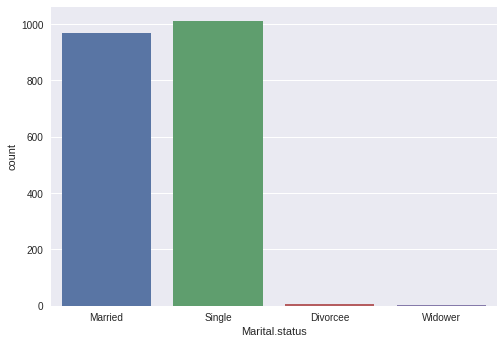

In [36]:
sns.countplot(df['Marital.status'])
## for encoding
### 1 -> married / possibly include divorcee and widower in married or single 
### 0 -> single 

In [0]:
### convert term in integer type
df['Term'] = df['Term'].astype('int64')

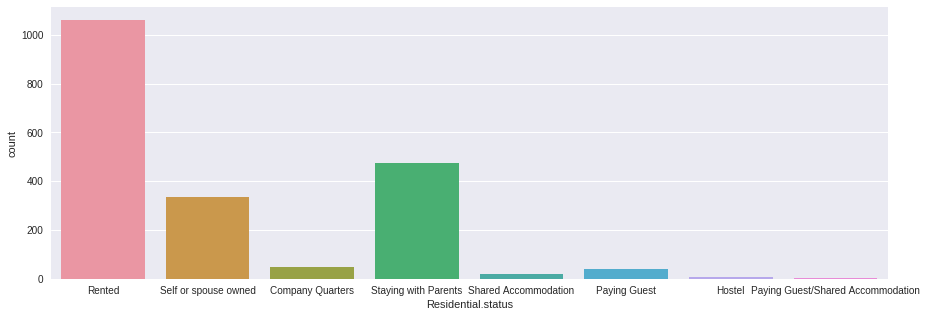

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(df['Residential.status'])
### can be thought as 1-> for own property 0 for rented or others
### will fill mising value as rented or 0 during encoding

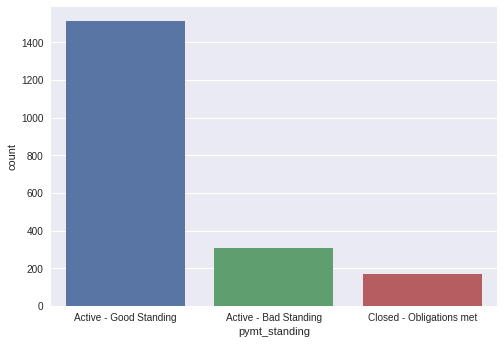

In [39]:
sns.countplot(df['pymt_standing'])  ### target variable
### encode the data 1 -> Active good 
### 0 - > Active Bad
### 2  - > Closed --> drop the rows regarding it

In [0]:
### we compute the no of months left in maturity from present time 
### negative value means --> maturity date has passed and it can be good indication for a bad customer 



df['Maturity.Date'] = (present.year -df['Maturity.Date'].apply(lambda x:x.year) )*12 + present.month - df['Maturity.Date'].apply(lambda x:x.month) - present.month

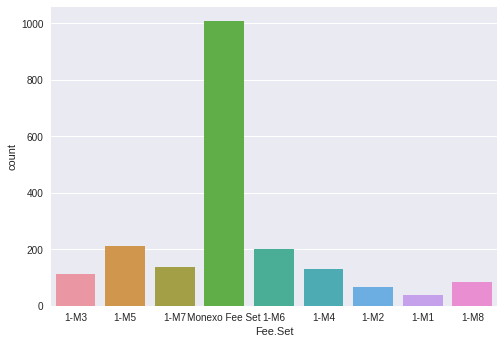

In [41]:
### ordinal variables --> 1 to 8 to be used ----> Monexo Fee Set to be treated as diff category seeing the distribution for now
sns.countplot(df['Fee.Set']) ### assuming it has lowest risk and gets the min value in ordinal ---> or can be dropped if it is required